# Decision Tree

A decision tree consists of three components: decision nodes, leaf nodes, and a root node. A decision tree algorithm divides a training dataset into branches, which further segregate into other branches. This sequence continues until a leaf node is attained. The leaf node cannot be segregated further. The nodes in the decision tree represent attributes that are used for predicting the outcome. Decision nodes provide a link to the leaves. The following diagram shows the three types of nodes in a decision tree.

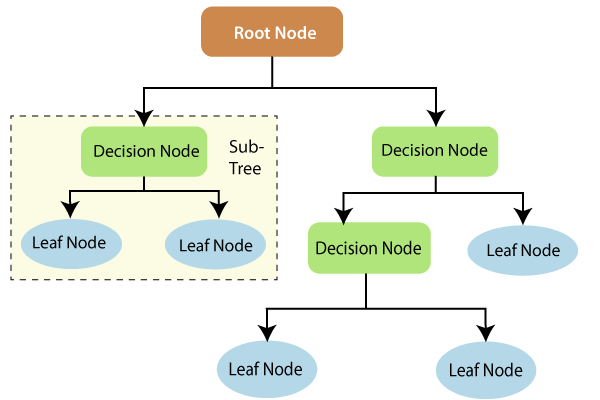

#### Advantages
1. It can be used for both Classification and Regression problems
2. Easy to Understand, Interpret, Visualise
3. Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. You can refer article (Trick to enhance power of regression model) for one such trick.  It can also be used in data exploration stage.
4. Less data preparation required: It is not influenced by outliers and missing values to a fair degree.
5. Data type is not a constraint: It can handle both numerical and categorical variables.
6. Non Parametric Method: Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
7. Can capture Nonlinear relationships

#### Disadvantages
1. Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
2. Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.
3. Cannot extrapolate.
4. Decision trees can be unstable: Small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
5. No Guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from matplotlib.pyplot import rcParams

In [14]:
df = pd.read_csv('heart_2020_cleaned.csv', header = 0)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data preprocessing

In [15]:
df_new= pd.get_dummies(df, columns=['HeartDisease', 'Smoking','Stroke',
                                    'AlcoholDrinking','DiffWalking','AgeCategory',
                                    'Sex','Race','Diabetic','PhysicalActivity','GenHealth',
                                   'Asthma','KidneyDisease','SkinCancer'], drop_first=True)
df_new.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,Stroke_Yes,AlcoholDrinking_Yes,DiffWalking_Yes,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


## Data preparation

In [18]:
Y=df_new['HeartDisease_Yes']
X=df_new.drop(['HeartDisease_Yes'],axis=1)

print(X.shape)
print(Y.shape)

(319795, 37)
(319795,)


In [19]:
from sklearn.model_selection import train_test_split #split date into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
stdscalar =StandardScaler()
X_train =  stdscalar.fit_transform(X_train)
X_test =  stdscalar.transform(X_test)

## Choose the optimal depth by cross validation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
depths = []
for i in range(2,15):
    print('CV for depth=',i)
    DTC = DecisionTreeClassifier(max_depth=i)
    ## 10-fold CV
    scores = cross_val_score(estimator=DTC, X=X, y=Y, cv=10, n_jobs=4)
    depths.append((i,scores.mean()))
print(depths)

CV for depth= 2
CV for depth= 3
CV for depth= 4
CV for depth= 5
CV for depth= 6
CV for depth= 7
CV for depth= 8
CV for depth= 9
CV for depth= 10
CV for depth= 11
CV for depth= 12
CV for depth= 13
CV for depth= 14
[(2, 0.9144045405344474), (3, 0.9149955452707678), (4, 0.9148704628923049), (5, 0.9153864196487138), (6, 0.9154583418476567), (7, 0.9151174957080281), (8, 0.9150893554656658), (9, 0.9145358759415698), (10, 0.9137134779525518), (11, 0.9126971980380887), (12, 0.9117934946403323), (13, 0.9101518190652828), (14, 0.9081442837692443)]


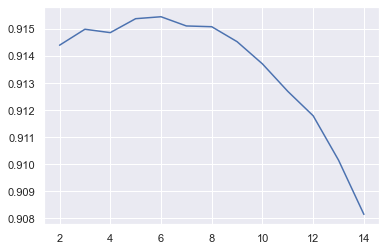

In [26]:
plt.plot(*zip(*depths))


We can see from the cv score plot that when the depth is setting to be 6, we obtain the highest score. Thus in the analysis follwing, I will set max-depth=6

In [29]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Prediction results analysis

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
y_pred = DTC.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(Y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58446
           1       0.58      0.06      0.11      5513

    accuracy                           0.92     63959
   macro avg       0.75      0.53      0.54     63959
weighted avg       0.89      0.92      0.88     63959

roc score: 0.5296609013028712


Because of the highly unbalanced label, the recall rate is extremy slow which means that our decision tree is biased by the label 0. Lets subsampling from the label 0 to match the size of lable 0

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Data balancing

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

balanced_data_X,balanced_data_y=smote.fit_sample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(balanced_data_X, balanced_data_y, test_size=0.3, random_state=0)


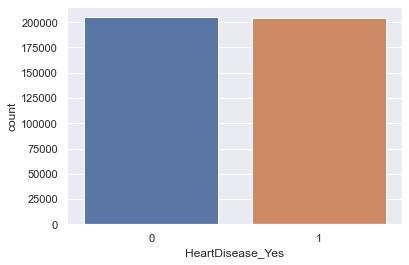

In [45]:
g = sns.countplot(y_train)
g.set_xticklabels(['0','1'])
plt.show()

### Redo the decision tree

In [46]:
DTC_balance=DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DTC_balance.fit(X_train,y_train)

y_pred = DTC_balance.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print('roc score:',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.35      0.50     87481
           1       0.60      0.96      0.74     87973

    accuracy                           0.65    175454
   macro avg       0.75      0.65      0.62    175454
weighted avg       0.75      0.65      0.62    175454

roc score: 0.653805454896829


### ROC curve 

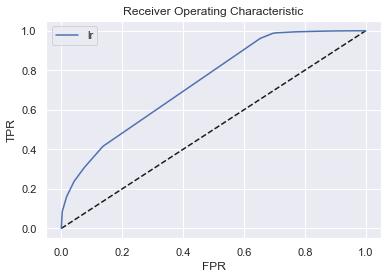

In [49]:

from sklearn.metrics import roc_curve
y_pred_probdt = DTC_balance.predict_proba(X_test)[:,1]
fpr , tpr, thresholds = roc_curve(y_test, y_pred_probdt)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label= "DT")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()


### Visualization

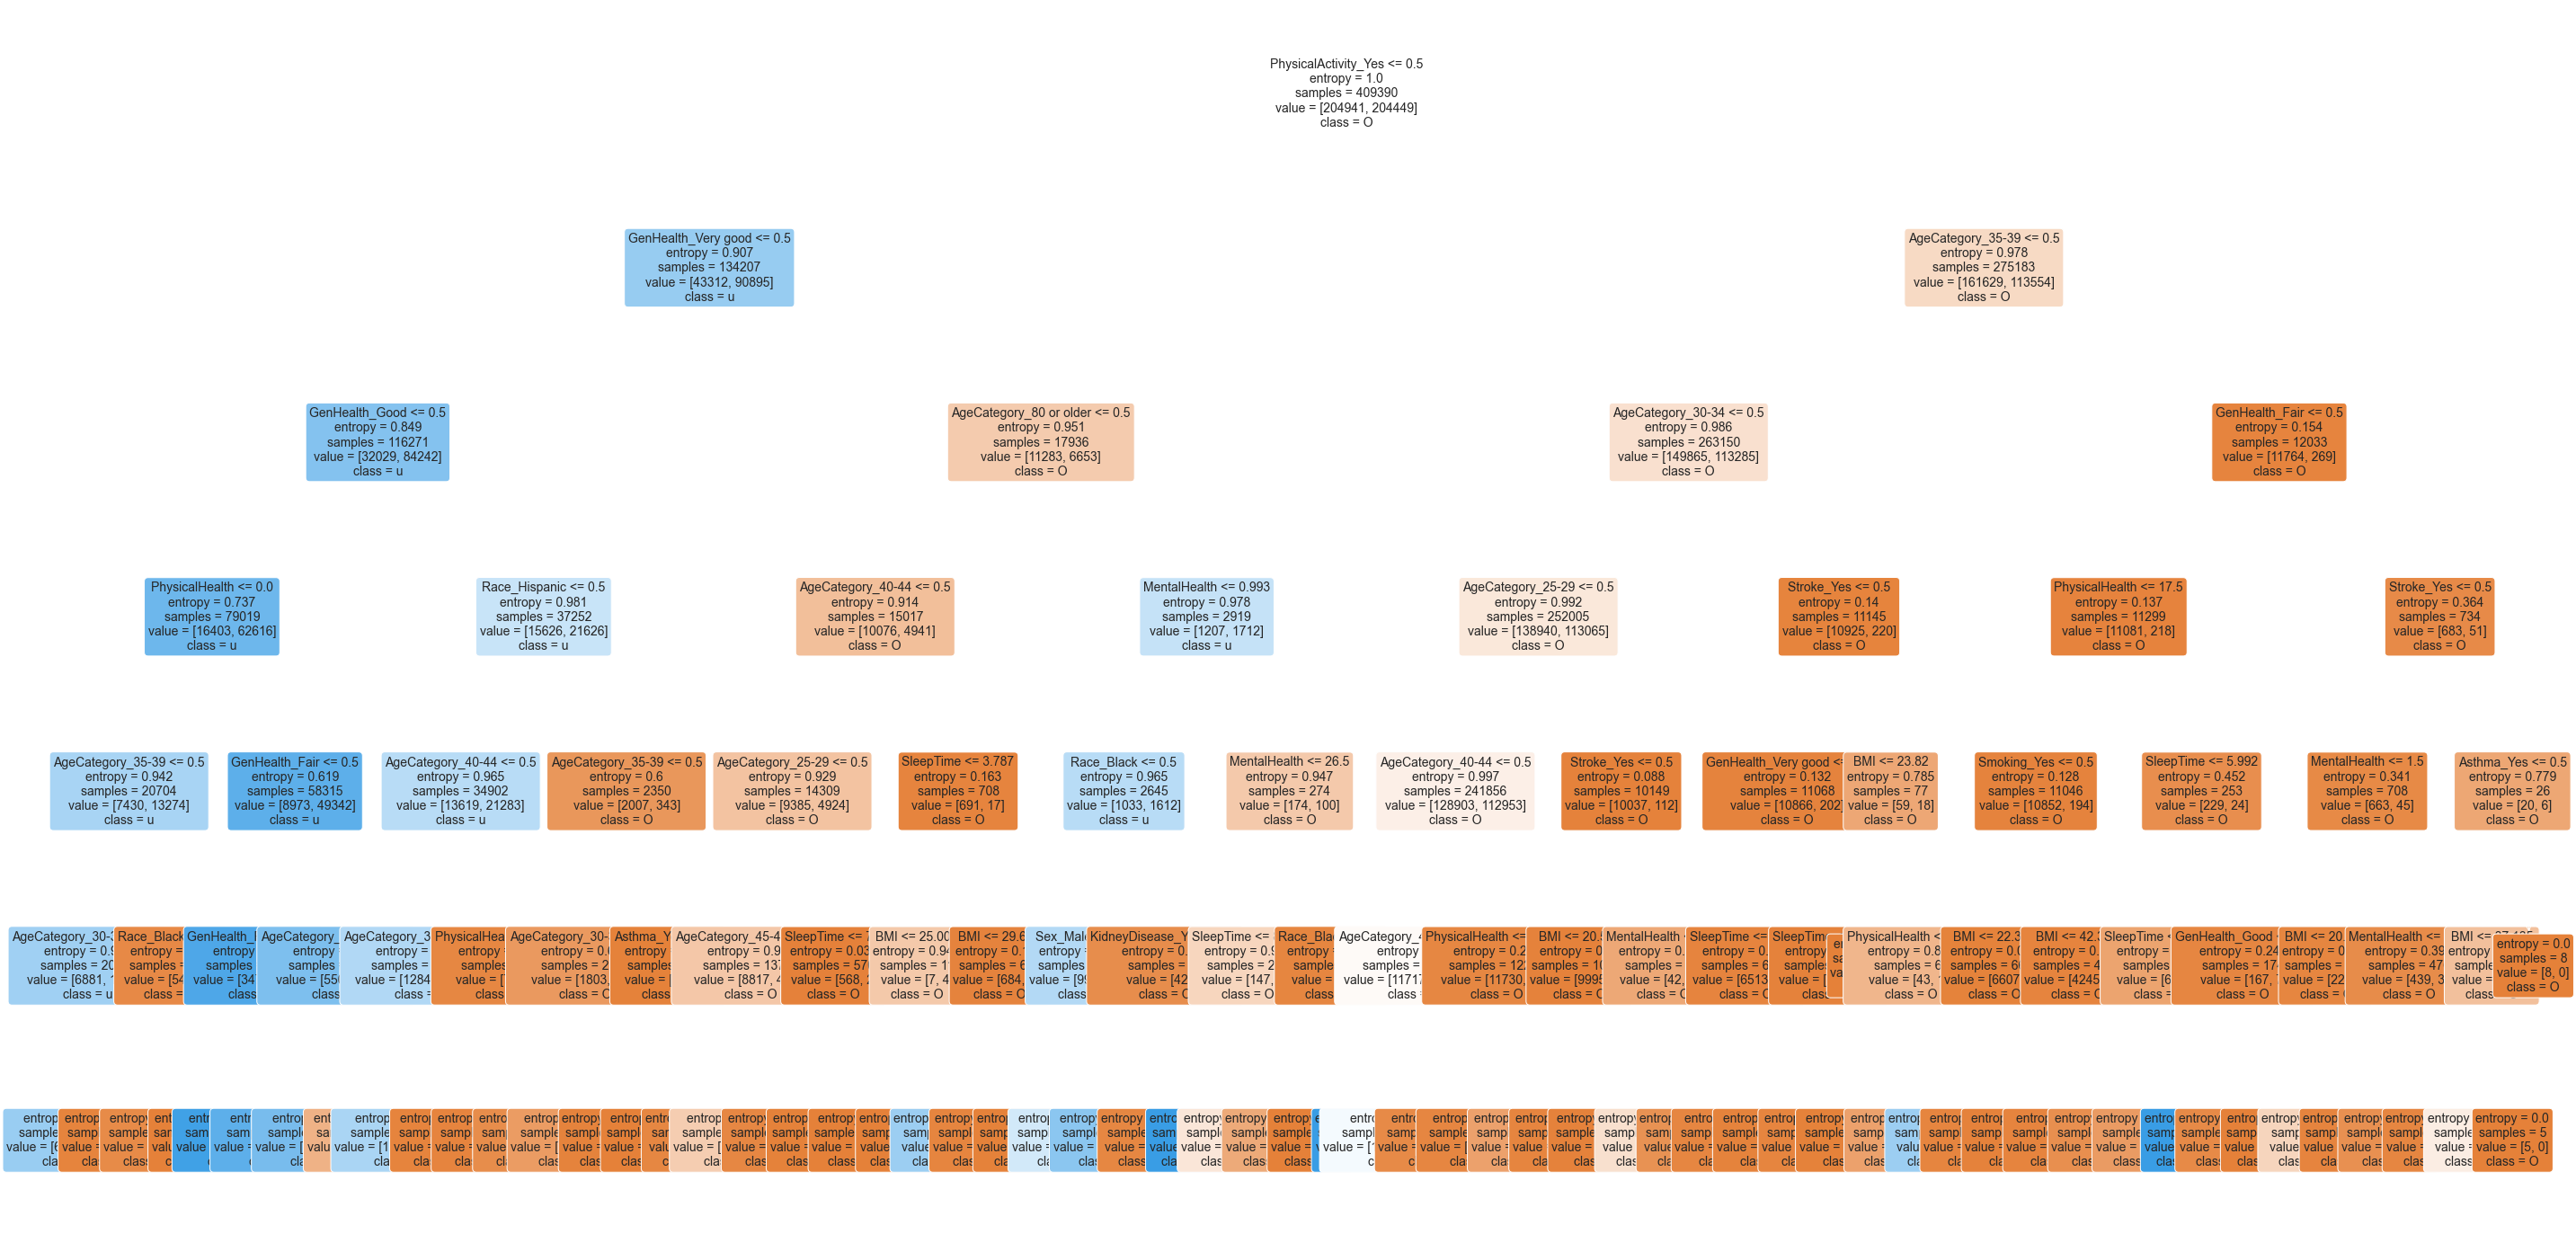

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25))
a = plot_tree(DTC_balance, 
              feature_names=X.columns, 
              class_names='Outcome', 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Conclusion

Although the results for the balanced data are not good enough,it indeeds improve the previous decision tree. A further improvement could be the feature engineering since we can see many categorical variables in this dataset. A suitable dimension reduction or data normalization could generate a better model.